# Estudio de variables socioeconómicas de una muestra de países

En el archivo paises.csv se encuentran 11 variables ecónomicas y sociales asociadas a 21 países. Quiero usar esas variables para visualizar países con comportamientos similares.

Para simplificar el análisis, se pueden analizar solo un par de variables y calculamos las componentes principales para ese par de variables.

Los variables corresponden a los siguientes indicadores:

X1 = Tasa anual de crecimiento de la población

X2 = Tasa de mortalidad infantil por cada 1000 nacidos vivos,

X3 = Porcentaje de mujeres en la población activa,

X4 = PNB en 1995 (en millones de dólares),

X5 = Producción de electricidad (en millones kW/h),

X6 = Líneas telefónicas por cada 1000 habitantes,

X7 = Consumo de agua per cápita,

X8 = Proporción de la superficie del país cubierta por bosques,

X9 = Proporción de deforestación anual,

X10 = Consumo de energía per cápita,

X11 = Emisión de CO2 per cápita.

In [3]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
datos = pd.read_csv("paises.csv")   # dataFrame
print(datos)

            Pais   X1   X2   X3      X4      X5   X6    X7   X8   X9   X10  \
0        Albania  1.0   30   41    2199    3903   12    94   53  0.0   341   
1         Angola  3.0  124   46    4422     955    6    57   19  0.7    89   
2   Arabia Saudi  4.3   21   13  133540   91019   96   497    1  0.0  4566   
3        Argelia  2.5   34   24   44609   19883   42   180    2  0.8   906   
4      Argentina  1.3   22   31  278431   65962  160  1043   22  0.1  1504   
5      Australia  1.4    6   43  337909  167155  510   933   19  0.0  5341   
6        Austria  0.6    6   41  216547   53259  465   304   47 -0.4  3301   
7     Bangladesh  2.0   79   42   28599    9891    2   220    6  4.1    64   
8        Belgica  0.3    8   40  250710   72236  457   917   20 -0.3  5120   
9          Benin  3.0   95   48    2034       6    5    26   45  1.3    20   
10     Tailandia  1.3   35   46  159630   71177   59   602   25  3.5   769   
11      Tanzania  3.1   82   49    3703    1913    3    40   38 

In [4]:
datosNP = datos.to_numpy()
print(datosNP)

[['Albania' 1.0 30 41 2199 3903 12 94 53 0.0 341 1.2]
 ['Angola' 3.0 124 46 4422 955 6 57 19 0.7 89 0.5]
 ['Arabia Saudi' 4.3 21 13 133540 91019 96 497 1 0.0 4566 13.1]
 ['Argelia' 2.5 34 24 44609 19883 42 180 2 0.8 906 3.0]
 ['Argentina' 1.3 22 31 278431 65962 160 1043 22 0.1 1504 3.5]
 ['Australia' 1.4 6 43 337909 167155 510 933 19 0.0 5341 15.3]
 ['Austria' 0.6 6 41 216547 53259 465 304 47 -0.4 3301 7.2]
 ['Bangladesh' 2.0 79 42 28599 9891 2 220 6 4.1 64 0.2]
 ['Belgica' 0.3 8 40 250710 72236 457 917 20 -0.3 5120 10.1]
 ['Benin' 3.0 95 48 2034 6 5 26 45 1.3 20 0.1]
 ['Tailandia' 1.3 35 46 159630 71177 59 602 25 3.5 769 2.0]
 ['Tanzania' 3.1 82 49 3703 1913 3 40 38 1.2 34 0.1]
 ['Tunez' 2.1 39 30 16369 6714 58 381 4 -1.9 595 1.6]
 ['Turquia' 1.9 48 35 169452 78322 212 585 26 0.0 957 2.5]
 ['Ucrania' 0.1 15 49 84084 202995 157 673 16 -0.3 3180 11.7]
 ['Uruguay' 0.6 18 40 16458 7617 196 241 4 -0.6 629 1.6]
 ['Venezuela' 2.4 23 33 65382 73116 111 382 52 1.2 2186 5.7]
 ['Vietnam' 2.2 41 

In [5]:
# Leo los datos y convierto las variables numéricas a float de 64 bits.
pais = datosNP[:, 0]
x1 = np.float64(datosNP[:, 4])   # PNB en 1995 (en millones de dólares),
x2 = np.float64(datosNP[:, 5])   # Producción de electricidad (en millones kW/h), 

# Construyo la matriz X de datos
X = np.c_[x1, x2]
print(X)

[[2.19900e+03 3.90300e+03]
 [4.42200e+03 9.55000e+02]
 [1.33540e+05 9.10190e+04]
 [4.46090e+04 1.98830e+04]
 [2.78431e+05 6.59620e+04]
 [3.37909e+05 1.67155e+05]
 [2.16547e+05 5.32590e+04]
 [2.85990e+04 9.89100e+03]
 [2.50710e+05 7.22360e+04]
 [2.03400e+03 6.00000e+00]
 [1.59630e+05 7.11770e+04]
 [3.70300e+03 1.91300e+03]
 [1.63690e+04 6.71400e+03]
 [1.69452e+05 7.83220e+04]
 [8.40840e+04 2.02995e+05]
 [1.64580e+04 7.61700e+03]
 [6.53820e+04 7.31160e+04]
 [1.76340e+04 1.22700e+04]
 [4.04400e+03 2.15900e+03]
 [3.60500e+03 7.78500e+03]
 [5.93300e+03 7.33400e+03]]


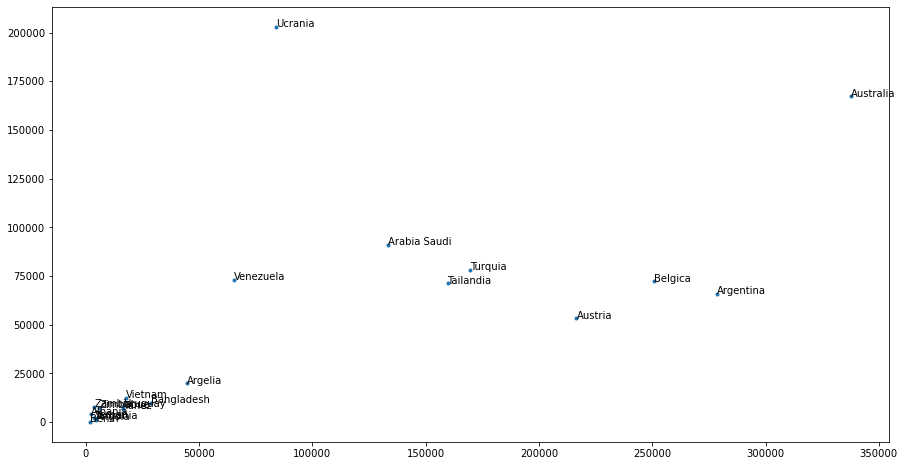

In [6]:
plt.figure(figsize=(15,8))
plt.plot(x1, x2, '.')

for label, x, y in zip(pais, x1, x2):
    plt.annotate(
        label,
        xy=(x, y))

plt.show()

In [7]:
# Llevo los datos a media 0, restando a cada columna el promedio de esa columna para tenerlos más prolijos y analizables
Xpromedio = np.mean(X, 0)   # El segundo parámetro = 0 indica que queremos promedios por columnas
print(Xpromedio)

[87871.14285714 45508.14285714]


In [8]:
B = X - Xpromedio #datos de X pero con media cero
print(B)

[[-85672.14285714 -41605.14285714]
 [-83449.14285714 -44553.14285714]
 [ 45668.85714286  45510.85714286]
 [-43262.14285714 -25625.14285714]
 [190559.85714286  20453.85714286]
 [250037.85714286 121646.85714286]
 [128675.85714286   7750.85714286]
 [-59272.14285714 -35617.14285714]
 [162838.85714286  26727.85714286]
 [-85837.14285714 -45502.14285714]
 [ 71758.85714286  25668.85714286]
 [-84168.14285714 -43595.14285714]
 [-71502.14285714 -38794.14285714]
 [ 81580.85714286  32813.85714286]
 [ -3787.14285714 157486.85714286]
 [-71413.14285714 -37891.14285714]
 [-22489.14285714  27607.85714286]
 [-70237.14285714 -33238.14285714]
 [-83827.14285714 -43349.14285714]
 [-84266.14285714 -37723.14285714]
 [-81938.14285714 -38174.14285714]]


In [9]:
print(np.mean(B,0))

[1.24730702e-11 2.77179338e-12]


In [10]:
# Calculo la matriz de covarianza:
# cov = (X - Xpromedio)^T * (X - Xpromedio) / N
Bt = np.transpose(B)
N = len(x1)
A = (Bt @ B) / N
print(A)

[[1.07830631e+10 3.85122686e+09]
 [3.85122686e+09 3.03709913e+09]]


In [11]:
# Puedo hacerlo directamente con el comando cov de numpy
print(np.cov(np.transpose(X), bias = 1))

# Tenemos que transponer X porque cov requiere variables en filas
# El parámetro bias = 1 hace que divida por N. Si no lo ponemos, o ponemos bias = 0, divide por N-1.

[[1.07830631e+10 3.85122686e+09]
 [3.85122686e+09 3.03709913e+09]]


Como obtuve la misma matriz, ahora puedo calcular las componentes principales. Calculo primero los autovalores y autovectores de la matriz de covarianza y los ordeno los autovectores por autovalor.

In [12]:
e = np.linalg.eigh(A)  # Uso eigh porque A es simétrica. Podemos usar eig también
print(e[0])
print(e[1])
print(np.linalg.norm(e[1][:,1]))

[1.44821901e+09 1.23719432e+10]
[[ 0.38138201 -0.92441753]
 [-0.92441753 -0.38138201]]
0.9999999999999999


In [13]:
# Los autovalores están ordenados de menor a mayor.
# Doy vuelta las columnas de la matriz de autovectores usando np.flip(-,1)
V = -np.flip(e[1], 1)   # V tiene los autovectores de A como columnas
print(V)

[[ 0.92441753 -0.38138201]
 [ 0.38138201  0.92441753]]


In [14]:
# V son las direcciones del nuevo espacio
# Calculo las componentes principales usando la formula
# Z = (X - Xpromedio) * V

Z = B @ V
print(Z)

[[-95064.28335448  -5786.70927187]
 [-94133.61735637  -9359.70434603]
 [ 59574.1140889   24653.75348979]
 [-49765.2515541   -7188.92820925]
 [183957.60489998 -53768.19715957]
 [277533.30018813  17092.54644602]
 [121906.25503491 -41909.62874164]
 [-68375.9451871  -10319.78216602]
 [160724.61737671 -37396.11092282]
 [-96703.05793607  -9326.23634066]
 [ 76124.78552621  -3638.79568794]
 [-94432.90959305  -8199.89869116]
 [-80893.22217788  -8592.35467517]
 [ 87929.38892585   -779.76655603]
 [ 56561.75276315 147027.95906941]
 [-80466.56106375  -7791.54864766]
 [-10260.21778438  34098.14149608]
 [-77604.87556405  -3938.7391402 ]
 [-94023.8632423   -8102.5432448 ]
 [-92284.02735279  -2734.34353935]
 [-90303.98663751  -4039.1131611 ]]


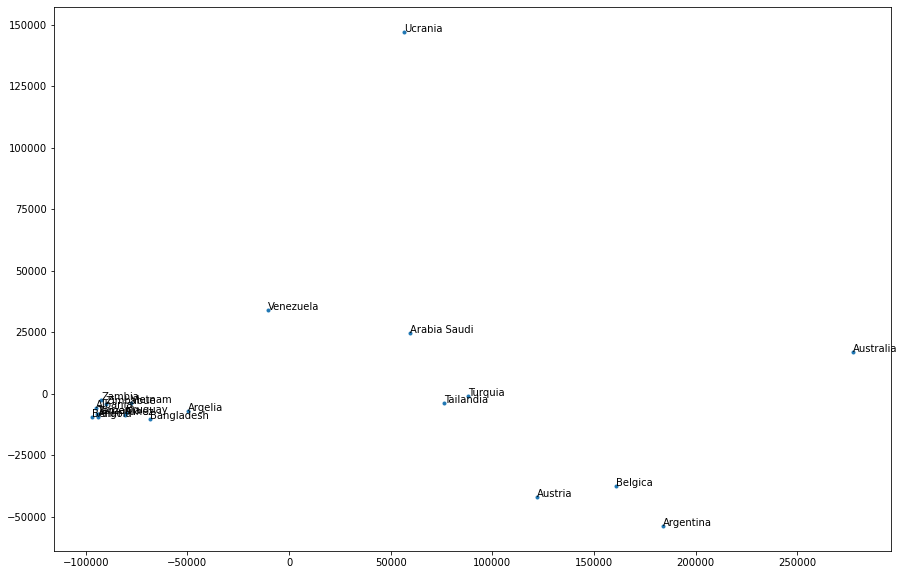

In [15]:
plt.figure(figsize=(15,10))
z1 = Z[:,0]
z2 = Z[:,1]
plt.plot(z1, z2, '.')

for label, x, y in zip(pais, z1, z2):
    plt.annotate(
        label,
        xy=(x, y))

plt.show()

In [16]:
# Pero es más fácil hacer todo con los comandos de Python, repito todo lo mismo usando los comandos de Python

pais = datosNP[:, 0]
x1 = np.float64(datosNP[:, 4])   # PNB en 1995 (en millones de dólares),
x2 = np.float64(datosNP[:, 5])   # Producción de electricidad (en millones kW/h), 

# Construyo la matriz X de datos
X = np.c_[x1, x2]

from sklearn.decomposition import PCA
pca = PCA()

principalComponents = pca.fit_transform(X)
print(principalComponents)
print(pca.components_)

[[-95064.28335448  -5786.70927187]
 [-94133.61735637  -9359.70434603]
 [ 59574.1140889   24653.75348979]
 [-49765.2515541   -7188.92820925]
 [183957.60489998 -53768.19715957]
 [277533.30018813  17092.54644602]
 [121906.25503491 -41909.62874164]
 [-68375.9451871  -10319.78216602]
 [160724.61737671 -37396.11092282]
 [-96703.05793607  -9326.23634066]
 [ 76124.78552621  -3638.79568794]
 [-94432.90959305  -8199.89869116]
 [-80893.22217788  -8592.35467517]
 [ 87929.38892585   -779.76655603]
 [ 56561.75276315 147027.95906941]
 [-80466.56106375  -7791.54864766]
 [-10260.21778438  34098.14149608]
 [-77604.87556405  -3938.7391402 ]
 [-94023.8632423   -8102.5432448 ]
 [-92284.02735279  -2734.34353935]
 [-90303.98663751  -4039.1131611 ]]
[[ 0.92441753  0.38138201]
 [-0.38138201  0.92441753]]


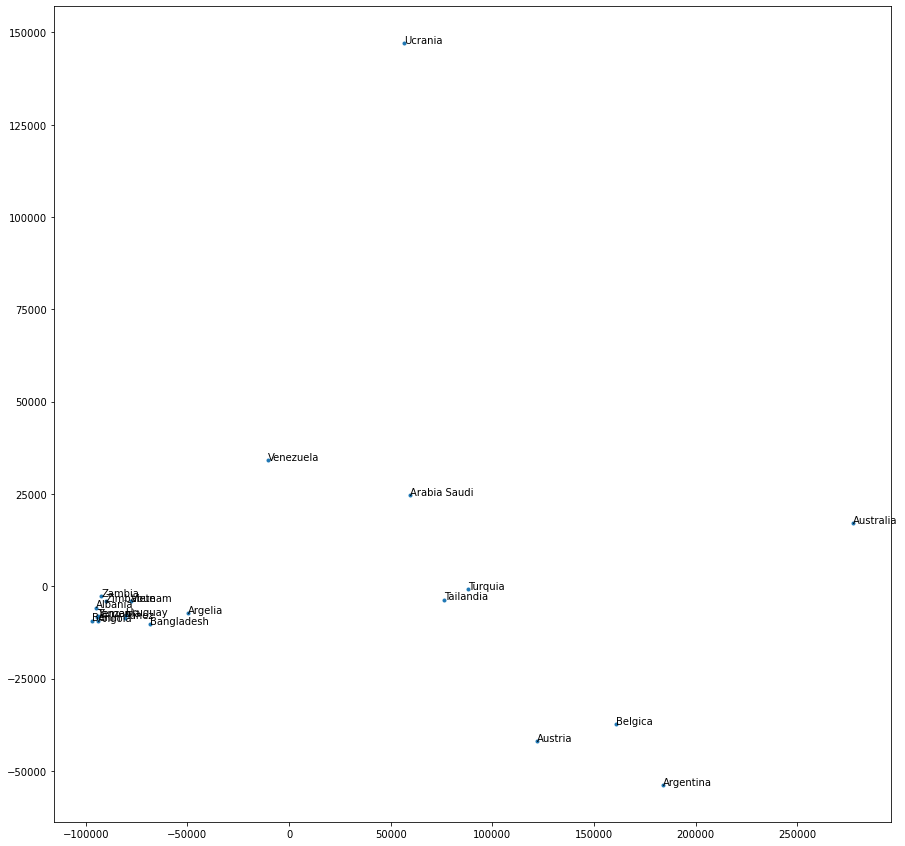

In [17]:
plt.figure(figsize=(15,15))
z1 = principalComponents[:,0]
z2 = principalComponents[:,1]
plt.plot(z1, z2, '.')

for label, x, y in zip(pais, z1, z2):
    plt.annotate(
        label,
        xy=(x, y))

plt.show()

Se puede observar que Argentina se encuentra debajo de la media en cuanto a producción de electricidad (eje Y) pero por encima de la media en cuanto a PNB en 1995.

In [18]:
# Veamos que variables aparecen más fuertemente en cada componente
pca.components_

array([[ 0.92441753,  0.38138201],
       [-0.38138201,  0.92441753]])